Imports

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from statannotations.Annotator import Annotator

Data loading and conversion

In [11]:
# Data loading
df = pd.read_csv('Proteasome_Caspase_for_plotting.csv')

# Split the 'Treatment' column into 'Compound' and 'Concentration'
df[['Compound', 'Concentration']] = df['Condition'].str.split('_', expand=True)

# Convert 'Concentration' to float
df['Concentration'] = df['Concentration'].astype(float)

df


,Unnamed: 0,Condition,Values,Compound,Concentration
0,0,GC,0.560681,GC,NaN
1,2,GC,0.790120,GC,NaN
2,3,GC,1.034226,GC,NaN
3,4,GC,1.050901,GC,NaN
4,5,GC,1.165512,GC,NaN
...,...,...,...,...,...
93,147,Tyr_0.5,0.641943,Tyr,0.5
94,148,Tyr_0.5,0.672982,Tyr,0.5
95,149,Tyr_0.5,0.640738,Tyr,0.5
96,150,Tyr_0.5,0.821134,Tyr,0.5


Plotting    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
c:\Users\JohannesWilbertz\anaconda3\envs\tools\lib\site-packages\statannotations\_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

GC vs. GC+MG132: Welch's t-test independent samples, P_val:9.607e-16 t=2.095e+01
TRPL_0 vs. TRPL+MG132: Welch's t-test independent samples, P_val:6.556e-05 t=4.921e+00
GC vs. TRPL_0: Welch's t-test independent samples, P_val:7.706e-02 t=-1.871e+00
TRPL_0 vs. Tyr_2.5: Welch's t-test independent samples, P_val:1.092e-03 t=3.846e+00
TRPL_0 vs. Tyr_1: Welch's t-test independent samples, P_val:3.772e-04 t=4.084e+00
TRPL_0 vs. Tyr_0.5: Welch's t-test independent samples, P_val:6.424e-04 t=3.948e+00


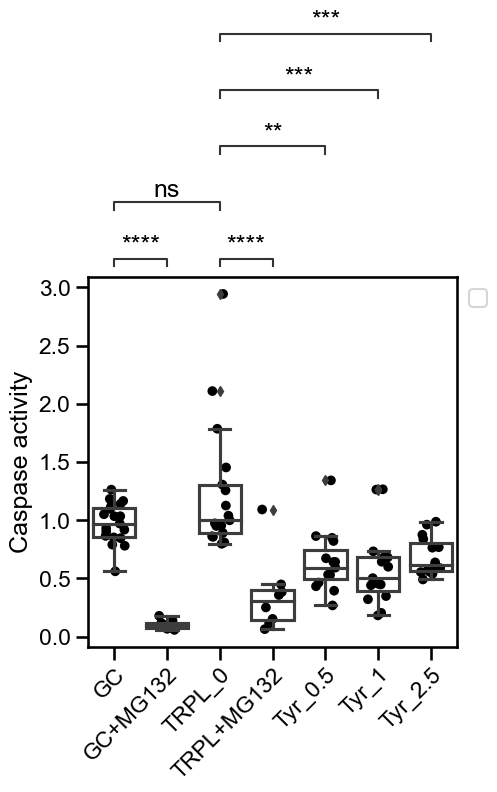

In [12]:
# Set the seaborn style to "talk" and font to "Arial"
sns.set_context("talk")
rcParams['font.family'] = 'Arial'

order = ['GC', 'GC+MG132', 'TRPL_0', 'TRPL+MG132', 'Tyr_0.5', 'Tyr_1', 'Tyr_2.5']

# Create a box plot with the filtered DataFrame
ax = sns.boxplot(data=df, x='Condition', y='Values', order=order)
# Transparancy of boxplot filling color
for patch in ax.patches: #artists
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 0))

ax = sns.stripplot(data=df, x='Condition', y='Values', size=7, 
                    zorder=0, order=order, jitter=0.2, color='black', 
                    dodge=True)

# Set plot title and labels
plt.xlabel('')
plt.ylabel('Caspase activity')

# Move the legend
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

# Axis scale
ax.set_box_aspect(1)
#ax.set_ylim(0, 1.5)

# Turn labels
labels = ax.get_xticklabels()
ax.set_xticklabels(labels, rotation=45, ha='right', rotation_mode='anchor')

# Add statistical annotation on top of figure
stat_pairs=[('GC', 'GC+MG132'), 
            ('GC', 'TRPL_0'),
            ('TRPL_0', 'TRPL+MG132'),
            ('TRPL_0', 'Tyr_0.5'),
            ('TRPL_0', 'Tyr_1'),
            ('TRPL_0', 'Tyr_2.5'),
            ]

annot = Annotator(ax, stat_pairs, data=df, x='Condition', y='Values')
annot.configure(test='t-test_welch', verbose=2, loc='outside') # t-test_welch
annot.apply_test()
annot.annotate()

# Save the plot
plt.savefig('Proteasome_Caspase' + '.pdf', bbox_inches='tight')
plt.show()
